# Numerisk løsning av ligninger

## Tilnærmede løsninger, absolutt og relativ feil

I matematikken er vi vant med å kunne løse likninger eksakt, som for eksempel å finne de verdier av $x$ som oppfyller $x^2 + 2x +1 = 1$.
Imidlertid er det ofte verken mulig eller hensiktsmessig å løse likninger eksakt, og man ''nøyer seg'' derfor med en tilnærming (approksimasjon).

En ligning kan alltid skrives på formen $f(x)=0$, og å løse ligningen er det samme som å finne et nullpunkt eller en *rot* for funksjonen.

> **Definisjon 1**: Funksjonen $f$ har en *rot* i $x=r$ dersom $f(r) = 0$.

En tilnærmet løsning av $f(x)=0$ vil være en $\tilde{x}$ sånn at $f(\tilde{x}) \approx 0$. Siden $f(x)=0$ hvis og bare hvis $|{f(x)}| = 0$, kan vi bruke $|f(x)| \ge 0$ som et mål på feilen vi gjør ved å benytte $\tilde{x}$ istedenfor den faktiske roten: den *absolutte feilen* er da gitt av $|f(\tilde{x})-f(r)| = |f(\tilde{x})|$.


## Fikspunktiterasjon

Èn måte å tilnærme røtter på er ved hjelp av såkalt **fikspunktiterasjon**, som baserer seg på *fikspunkter*.

> **Definisjon 2**: Vi sier at $r$ er et *fikspunkt* for funksjonen $g$ dersom $g(r) = r$.

Fra definisjonene ovenfor ser vi at et fikspunkt $r$ for en funksjon $g$ vil være en rot for funksjonen $f$ gitt ved $f(x) = g(x)-x$.

Vi kan da også gå motsatt vei, gitt ligningen $f(x)=0$ kan vi skrive den om som et fikspunkt for en funksjon $g$.
For eksempel kan vi legge til $x$ på begge sider og få $x = f(x) + x$; dermed er en rot for $f$ også et fikspunkt for funksjonen $g$ gitt ved $g(x) = f(x) + x$.

Idéen bak dette er at vi med ligningen $x=g(x)$ lett kan definere en *iterasjon*, det vil si gitt en verdi $x_n$ kan vi lage oss en ny verdi $x_{n+1}$ gjennom å definere den nye verdien som
$$ x_{n+1} = g(x_n). \tag{1}$$
Dersom vi fortsetter denne iterasjonen og neste *iterat* $x_{n+1}$ etter hvert ikke forandrer seg nevneverdig fra forrige iterat $x_n$, det vil si $|x_{n+1}-x_n| = |g(x_n)-x_n|$ er liten, vil vi ha en god tilnærming av et fikspunkt for $g$, og dermed også av en rot for $f$.

**Eksempel 1**:
La oss se på funksjonen $f(x) = e^{x}-2x-1$, hvor vi kan sjekke at $x=0$ er en rot. Det finnes også en rot $r$ til, og denne oppfyller $1 < r < 2$.
Dette følger av at $e^1 = e \approx 2.72$ og $e^2 \approx 7.39$, og dermed har vi at $f(1) < 0 < f(2)$.
La oss plotte funksjonen $f$ på dette intervallet.

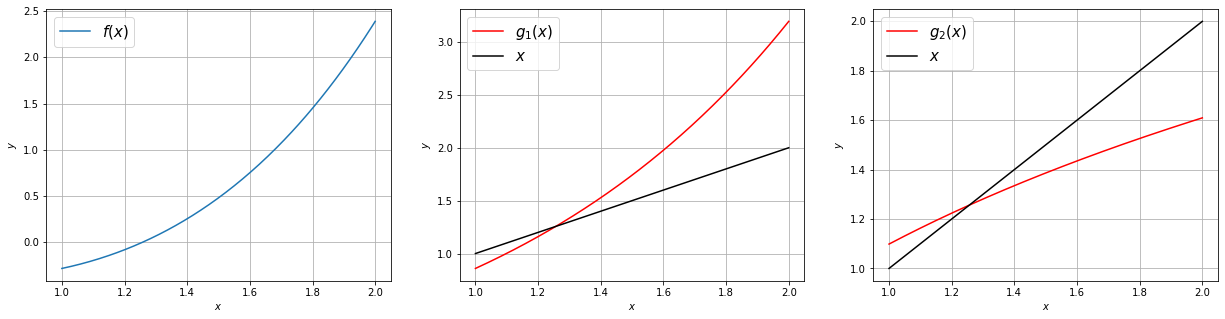

In [2]:
from matplotlib import pyplot as plt # importer plottefunksjonalitet
import numpy as np # importer matematiske funksjoner etc.
%matplotlib inline
params = {'legend.fontsize': 15}
plt.rcParams.update(params)

def f1(x):
    return np.exp(x)-2*x-1

def g1(x):
    return (np.exp(x)-1)/2

def g2(x):
    return np.log(1+2*x)

def g3(x):
    return ((x-1)*np.exp(x)+1)/(np.exp(x)-2)

x = np.linspace(1,2,301)

plt.figure(figsize=(21, 5))
plt.subplot(131)
plt.plot(x,f1(x))
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$f(x)$'])

plt.subplot(132)
plt.plot(x,g1(x),'r')
plt.plot(x,x,'k')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$g_1(x)$','$x$'])

plt.subplot(133)
plt.plot(x,g2(x),'r')
plt.plot(x,x,'k')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['$g_2(x)$','$x$'])

Ganske riktig, funksjonen $f$ har ett nullpunkt i $(1,2)$, og mer presist et sted mellom $x=1{,}2$ og $x=1{,}3$.
Det er mer enn èn måte å skrive om $f(x) = e^x-2x-1=0$ på formen $x=g(x)$; vi gir to eksempler nedenfor,
$$ x = g_1(x) = \frac{e^x-1}{2} \quad \text{og} \quad x = g_2(x) = \ln(1+2x). $$
Ovenfor har vi plottet $y=g(x)$ og $y=x$ for hver av disse, og vi ser at disse kurvene krysser hverandre i punktet $r$ hvor $f(r))=0$, som de burde.

---

Dette fremstår kanskje litt mystisk: er det i det hele tatt gitt at en slik prosess kan føre fram?
Under visse betingeleser kan vi garantere at det finnes et fikspunkt, som i det følgende resultatet.

> **Teorem 1** (Brouwer): Gitt en kontinuerlig funksjon g på intervallet $[a,b]$, som oppfyller at $a \le g(x) \le b$ for $a \le x \le b$. Da vil det finnes minst ett fikspunkt for $g$ på $[a,b]$.

I illustrasjonen ovenfor så vi at det var mer enn én måte å velge $g$ på, og alle er ikke like hensiktsmessige sett fra teoremet ovenfor:
Fra plottet ser vi at det finnes $1 < x < 2$ sånn at $g_1(x) > 2$, vi havner altså utenfor intervallet.
På den andre siden ser vi at $1 < g_2(x) < 2$ for alle $1 < x < 2$.

---
**Algoritme - fikspunktiterasjon**:
1. Velg en startverdi $x_0$.
2. Iterér for å finne neste verdi, $x_{n+1} = g(x_n)$.
3. Gjenta iterasjonen inntil ønsket nøyaktighet er oppnådd, det vil si, når $|x_n-g(x_n)|$ er liten nok.

---

**Eksempel 2**:
La oss

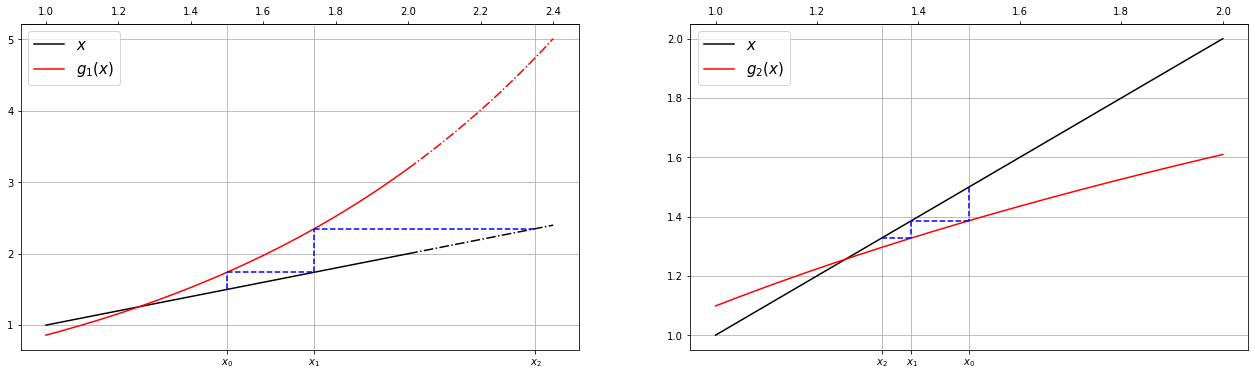

In [3]:
#from matplotlib.widgets import Button, Slider

init_guess = 1.5
N = 2
X1 = np.zeros(N+1)
X1[0] = init_guess
X2 = np.copy(X1)

for k in range(0,N):
    X1[k+1] = g1(X1[k])
    X2[k+1] = g2(X2[k])
    
    
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(22,6))
ax1.plot(x,x,'k')
ax1.plot(x,g1(x),'r')
ax1.plot(2+0.4*(x-1),2+0.4*(x-1),'k-.')
ax1.plot(2+0.4*(x-1),g1(2+0.4*(x-1)),'r-.')
for k in range(0,N):
    ax1.plot([X1[k],X1[k]],[X1[k],X1[k+1]],'b--')
    ax1.plot([X1[k],X1[k+1]],[X1[k+1],X1[k+1]],'b--')
    
#plt.xlabel('$x$')
#plt.ylabel('$y$')
ax1.set_xticks(X1)
ax1.set_xticklabels(['$x_0$','$x_1$','$x_2$'])
ax1.legend(['$x$','$g_1(x)$'])
ax1.secondary_xaxis('top')
ax1.grid(True)

ax2.plot(x,x,'k')
ax2.plot(x,g2(x),'r')
for k in range(0,N):
    ax2.plot([X2[k],X2[k]],[X2[k],X2[k+1]],'b--')
    ax2.plot([X2[k],X2[k+1]],[X2[k+1],X2[k+1]],'b--')
ax2.grid(True)
ax2.set_xticks(X2)
ax2.set_xticklabels(['$x_0$','$x_1$','$x_2$'])
ax2.legend(['$x$','$g_2(x)$'])
ax2.secondary_xaxis('top')


---

Legg merke til hvordan andre iterat $x_2$ med $g_1$ havner utenfor intervallet $(1,2)$, og vi ser at vi faktisk går lenger og lenger bort fra fikspunktet.
På den andre siden, med $g_2$ nærmer vi oss sakte fikspunktet.

Hva er så grunnen til denne oppførselen? Hvorfor er $g_1$ et dårligere valg enn $g_2$ her?
Før vi svarer på dette gir vi en tilstrekkelig betingelse for at en fikspunktiterasjon med $g$ vil fungere slik vi ønsker.

> **Definisjon 3**: Anta at $g$ er en kontinuelig funksjon på intervallet $[a,b]$. Dersom det finnes en konstant $0 < L < 1$ sånn at
$$ |g(x)-g(y)| \le L|x-y| \quad \text{for alle} \ x, y \in [a,b], \tag{2}$$ sier vi at $g$ er en *kontraksjon* på $[a,b]$.

At $g$ er en kontraksjon betyr altså at avstanden mellom $g(x)$ og $g(y)$ er strengt mindre enn avstanden mellom $x$ og $y$. Fra ligning (1) ser vi da at
$$|x_{n+1}-x_n| = |g(x_n)-g(x_{n-1})| \le L |x_n-x_{n-1}| < |x_n-x_{n-1}|,$$
det vil si, avstanden mellom to påfølgende iterater må avta strengt.
Da kan vi bevise det følgende resultatet.

> **Teorem 2**: Anta at $g$ oppfyller betingelsene i Teorem 1 på intervallet $[a,b]$, og i tillegg er en kontraksjon der. Da har $g$ et éntydig (unikt) fikspunkt $r$
på $[a,b]$, og iterasjonen gitt av ligning (1) vil *konvergere*, det vil si $$ \lim\limits_{n\to\infty}|x_n-r| = 0 \quad \text{for enhver startverdi} \ x_0. $$

Med Teorem 2 på plass kan vi finne ut av hva som gikk galt i Eksempel 2.

---
**Eksempel 2** (forts.):
Fra plottet av iterasjonen med $g_1$ ser det ikke ut som dette er en kontraksjon på intervallet $[1,2]$. Fra sekantsetningen har vi
$$|g(x)-g(y)| = |g'(s)||x-y| \quad \text{for en $s$ mellom $x$ og $y$}. \tag{3}$$
I vårt tilfelle er
$$ g_1'(x) = \frac{e^x}{2} \quad \text{og} \quad g_2'(x) = \frac{2}{1+2x}.$$
Legg merke til at $g_1'(x) > 1$ for $x > \ln(2) \approx 0.69$, og dermed ser vi at $g_1$ faktisk er det motsatte av en kontraksjon for disse verdiene av $x$, som inkluderer vårt intervall:
avstanden mellom to påfølgende iterater vil altså øke.
Derimot ser vi at $g_2'(x) < 1$ for $x > \frac{1}{2}$; mer spesifikt er $\frac{2}{5} \le g_1'(x) \le \frac{2}{3}$ for $1 \le x \le 2$, og dermed er $g_2$
en kontraksjon på $[1,2]$ med $L = \frac{2}{3}$.

---

Basert på hva som skjedde med $g_1$ i eksempel 2 er det typisk en god idé å i tillegg oppgi et maksimalt antall iterasjoner når man implementerer fikspunktalgoritmen, nettopp for å hindre at programmet aldri stopper i tilfeller hvor vi aldri kommer nær nok fikspunktet.
Nedenfor 

In [144]:
def fixpoint(g,x0,tol,maxIt):
    # implementasjon av fikspunktalgoritmen for en funksjon g,
    # startgjett x0, feiltoleranse tol and maksimalt antall iterasjoner maxIt.
    # Returnerer siste iterat, feilen and antall iterasjoner
    x_prev = x0
    x_next = g(x_prev)
    It = 1
    err = np.abs(x_next-x_prev)
    while err > tol and It < maxIt:
        x_prev = x_next
        x_next = g(x_next)
        err = np.abs(x_next-x_prev)
        It += 1
    return x_next, err, It

# La oss sjekke at vi får det samme svaret som i figurene i eksempel 2 ved å velge x0 = 1.5 og maxIt = 2
display(fixpoint(g1,1.5,1e-3,2))
display(fixpoint(g2,1.5,1e-3,2))

(2.351078530960102, 0.6102339957910696, 2)

(14.396484375, 16.771484375, 2)

### Andre problemer:
Det fins også andre feller å gå i enn at $g$ tar oss ut av intervallet vi er interessert i.

**Eksempel 3**:
La oss se på $f(x) = x^3 + x -1 = 0$, som oppfyller $f(0) = -1$ og $f(1) = 1$, og siden $f$ er kontinuerlig må den ha minst én rot på $(0,1)$. Vi ser også at $f'(x) = 3x^2 + 1 \ge 1$,
så den kan altså ikke ha mer enn én rot, og dermed finnes det nøyaktig én rot $r \in (0,1)$. 
En åpenbar kandidat for fikspunktfunksjonen er da $g_1(x) = 1-x^3$, og en annen får vi ved å ta kubikkrot, nemlig $g_2(x) = \sqrt[3]{1-x}$.
Det er ikke vanskelig å sjekke at både $g_1$ og $g_2$ avbilder $x \in [0,1]$ til $[0,1]$.

Nedenfor har vi plottet noen iterasjoner av fikspunktmetoden for et gitt startpunkt $x_0 \in [0,1]$; prøv å endre på dette og se hvordan resultatet endrer seg.

Text(0.5, 1.0, 'Iterasjon med $g_2$')

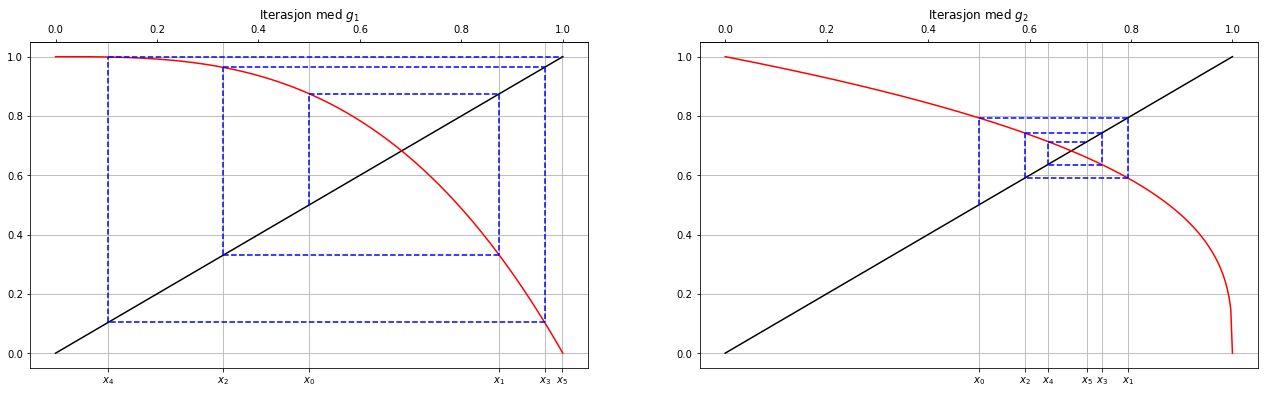

In [147]:
def f2(x):
    # f
    return x**3 + x -1

def g2(x):
    # g_1
    return 1 - x**3

def g3(x):
    # g_2
    return (1-x)**(1/3)

x0 = 0.5 # Startgjett, prøv å endre dette
N = 5 # Antall iterasjoner
X = np.zeros([2,N+1])
X[0,0] = x0
X[1,0] = x0

fig, (ax3,ax4) = plt.subplots(1,2,figsize=(22,6))
ax3.plot(x-1,x-1,'k')
ax4.plot(x-1,x-1,'k')
ax3.plot(x-1,g2(x-1),'r')
ax4.plot(x-1,g3(x-1),'r')
ax3.grid(True)
ax4.grid(True)

for k in range(1,N+1):
    X[0,k] = fixpoint(g2,X[0,k-1],np.Inf,1)[0] # hent ut kun første verdi
    X[1,k] = fixpoint(g3,X[1,k-1],np.Inf,1)[0]
    
    ax3.plot([X[0,k-1],X[0,k-1]],[X[0,k-1],X[0,k]],'b--')
    ax3.plot([X[0,k-1],X[0,k]],[X[0,k],X[0,k]],'b--')
    
    ax4.plot([X[1,k-1],X[1,k-1]],[X[1,k-1],X[1,k]],'b--')
    ax4.plot([X[1,k-1],X[1,k]],[X[1,k],X[1,k]],'b--')

ax3.set_xticks(X[0,:])
xlabels = ['$x_{:d}$'.format(k) for k in range(0,N+1)]
ax3.set_xticklabels(xlabels)
ax3.secondary_xaxis('top')
ax3.set_title('Iterasjon med $g_1$')

ax4.set_xticks(X[1,:])
xlabels = ['$x_{:d}$'.format(k) for k in range(0,N+1)]
ax4.set_xticklabels(xlabels)
ax4.secondary_xaxis('top')
ax4.set_title('Iterasjon med $g_2$')

Fra plottene ovenfor la du forhåpentligvis merke til at uansett hvor nær fikspunktet $r$, som vi ser ligger et sted mellom $0.6$ og $0.8$, vi starter, så vil iterasjonen med $g_1$ bevege seg bort fra det.
For mange nok iterasjoner vil man ende opp med å hoppe mellom $x=0$ og $x=1$.
På den andre siden, med $g_2$ ser vi at vi vil nærme oss fikspunktet $r$.

Igjen må vi se på de deriverte til $g_1$ og $g_2$ for å forklare denne oppførselen:
$$ g_1'(x) = -3x^2, \qquad g_2'(x) = -\frac{1}{3(1-x)^{2/3}}. $$
Vi ser at $|g_1'(x)| < 1$ for $|x| < 1/\sqrt{3}$, og $|g_1'(x)| > 1$ for $|x| > 1/\sqrt{3}$; her ligger $x=1/\sqrt{3} \approx 0.58$ inni intervallet vårt, men $f(1/\sqrt{3}) < 0$, så vi ser at $1/\sqrt{3} < r < 1$.
Dette betyr da at i området rundt $x=r$ er $|g_1'(x)| > 1$, og ifølge ligning (3) vil feilen $|x_{n+1} - r| = |g(x_n)-g(r)|$ øke.

$|g_2'(x)| < 1$ for $|x-1| > 3^{-3/2}$, og $x = 1-3^{-3/2} \approx 0.81$ ligger i intervallet vårt $[0,1]$.
Siden $f(1-3^{-3/2}) > 0$ følger det at $3^{-1/2} < r < 1-3^{-3/2}$, og i tillegg har vi at $|g_2'(x)| < 1$ i dette intervallet, så ifølge ligning (3) vil feilen avta her.
Så ved å velge $g_2$ for fikspunktiterasjonen vår er vi garantert å konvergere dersom vi starter med en startgjetning $x_0$ nær nok fikspunktet $r$.

> **Definisjon 4**: En iterativ metode er *lokalt konvergent* mot $r$ dersom metoden konvergerer til $r$ for startgjetninger nær nok $r$.

For fikspunktmetoden, gitt av ligning (1), har vi sett at denne er lokalt konvergent til $r$ dersom $g$ er kontinuerlig deriverbar og $g'(r) < 1$.

### Noe om konvergensrate?

Kilder: Sauer kapittel 1.2